In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)

In [3]:
perf = pd.read_csv("StudentsPerformance.csv")
perf.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df1 = perf.interpolate()

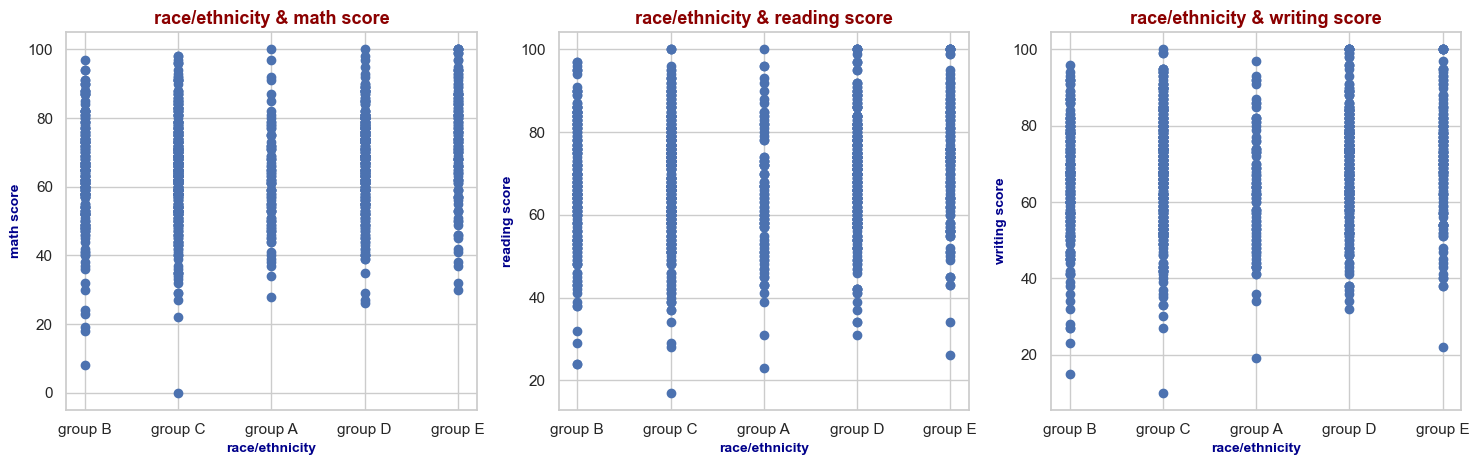

In [11]:
#Soru1
plt.figure(figsize=(18,5))
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

plt.subplot(1,3,1)
plt.scatter(df1["race/ethnicity"], df1["math score"])
plt.title("race/ethnicity & math score", fontdict=baslik_font)
plt.xlabel('race/ethnicity', fontdict=eksen_font )
plt.ylabel('math score', fontdict=eksen_font )


plt.subplot(1,3,2)
plt.scatter(df1["race/ethnicity"], df1["reading score"])
plt.title("race/ethnicity & reading score", fontdict=baslik_font)
plt.xlabel('race/ethnicity', fontdict=eksen_font )
plt.ylabel('reading score', fontdict=eksen_font )

plt.subplot(1,3,3)
plt.scatter(df1["race/ethnicity"], df1["writing score"])
plt.title("race/ethnicity & writing score", fontdict=baslik_font)
plt.xlabel('race/ethnicity', fontdict=eksen_font )
plt.ylabel('writing score', fontdict=eksen_font )

plt.show()

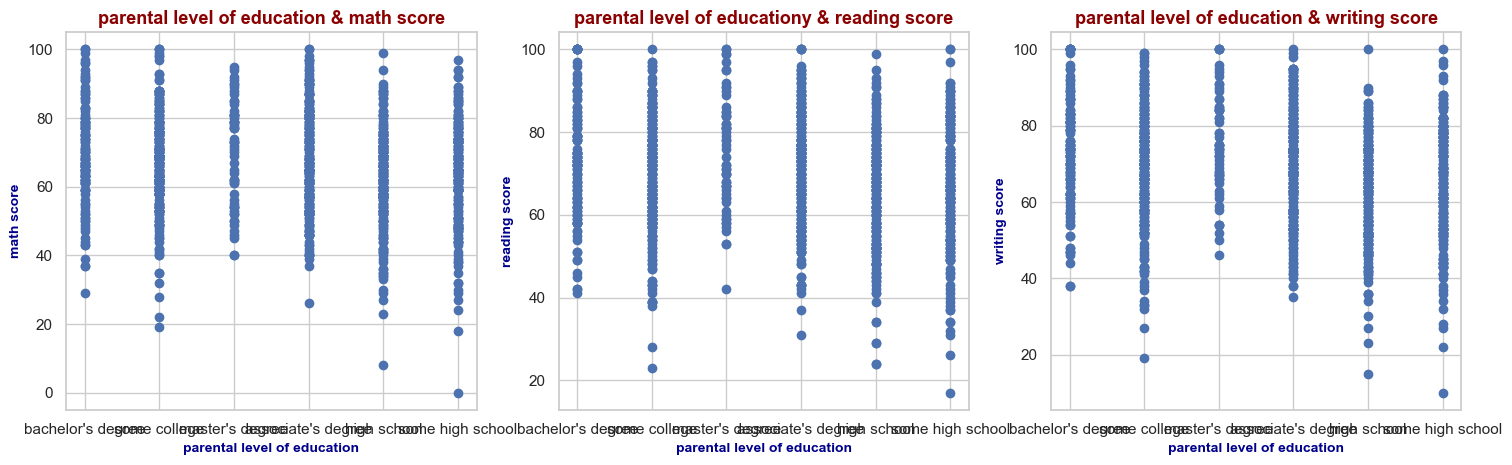

In [13]:
#Soru1
plt.figure(figsize=(18,5))
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }
plt.subplot(1,3,1)
plt.scatter(df1["parental level of education"], df1["math score"])
plt.title("parental level of education & math score", fontdict=baslik_font)
plt.xlabel('parental level of education', fontdict=eksen_font )
plt.ylabel('math score', fontdict=eksen_font )


plt.subplot(1,3,2)
plt.scatter(df1["parental level of education"], df1["reading score"])
plt.title("parental level of educationy & reading score", fontdict=baslik_font)
plt.xlabel('parental level of education', fontdict=eksen_font )
plt.ylabel('reading score', fontdict=eksen_font )

plt.subplot(1,3,3)
plt.scatter(df1["parental level of education"], df1["writing score"])
plt.title("parental level of education & writing score", fontdict=baslik_font)
plt.xlabel('parental level of education', fontdict=eksen_font )
plt.ylabel('writing score', fontdict=eksen_font )

plt.show()

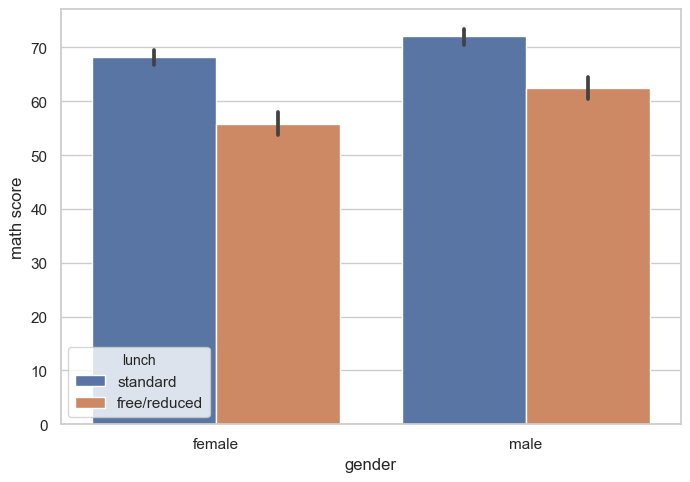

In [14]:
#Soru1
sns.barplot(y = "math score" , data = df1, x = 'gender' , hue="lunch")

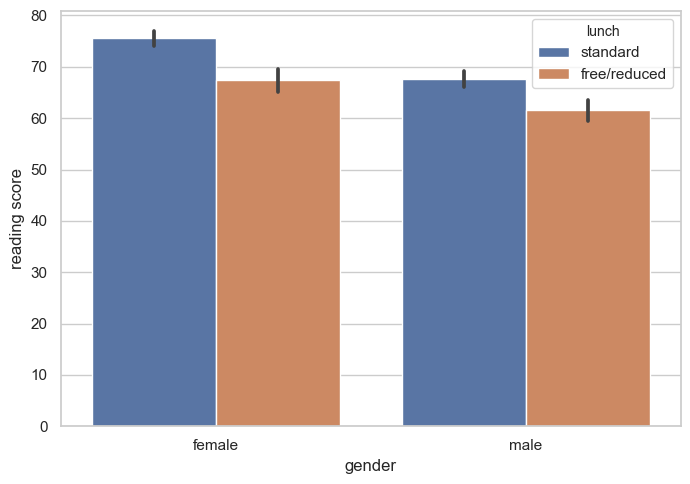

In [15]:
#Soru1
sns.barplot(y = "reading score" , data = df1, x = 'gender' , hue="lunch")

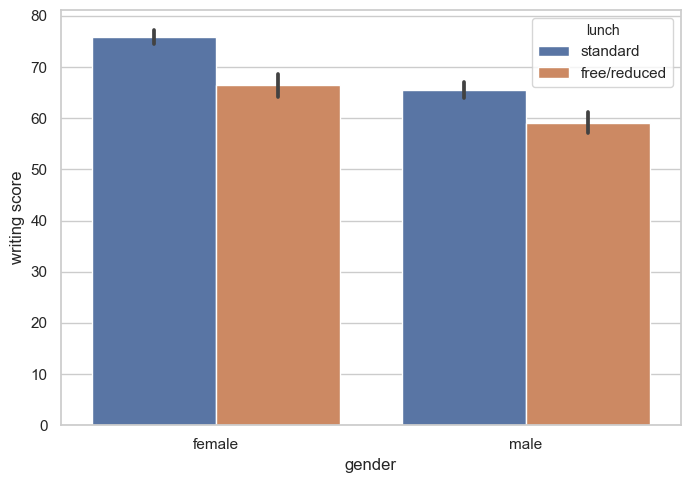

In [16]:
#Soru1
sns.barplot(y = "writing score" , data = df1, x = 'gender' , hue="lunch")

In [17]:
#Soru1
#Erkeklerin genel olarak matematik notları daha yüksektir.
#Kızların genel olarak okuma notları daha yüksektir.
#Kızların genel olarak yazma notları daha yüksektir.

In [7]:
#Soru1
df1.corr()

,math score,reading score,writing score
math score,1.000,0.818,0.803
reading score,0.818,1.000,0.955
writing score,0.803,0.955,1.000


Text(0.5, 1.0, 'Korelasyon Matrisi (Ogrenci performansi)')

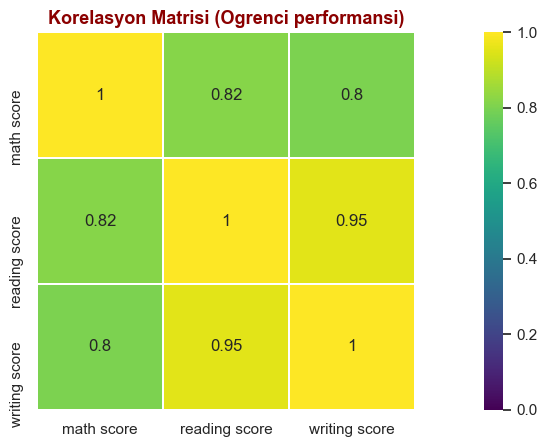

In [9]:
#Soru1
corrdf1 = df1.corr()
plt.figure(figsize=(18,5))

sns.heatmap(corrdf1, square=True, annot=True, linewidths=.5, vmin=0, vmax=1, cmap='viridis')
plt.title("Korelasyon Matrisi (Ogrenci performansi)", fontdict=baslik_font)

In [ ]:
#Soru1
#Okuma skoru ve yazma skoru arasında belirgin bir ilişki vardır.

In [31]:
#Soru2
df1.groupby("lunch").mean()[["math score", "reading score", "writing score"]]

,math score,reading score,writing score
lunch,,,
free/reduced,58.921,64.654,63.023
standard,70.034,71.654,70.823


In [33]:
#Soru2
#ttest kullanmak için import ediyoruz.
from scipy.stats.stats import ttest_ind

In [37]:
#Soru2
ttest_ind(df1[df1.lunch == "free/reduced"][["math score", "reading score", "writing score"]],
          df1[df1.lunch == "standard"][["math score", "reading score", "writing score"]])

Ttest_indResult(statistic=array([-11.83718047,  -7.45105647,  -8.0097842 ]), pvalue=array([2.41319560e-30, 2.00279665e-13, 3.18618958e-15]))

In [38]:
#Soru2
#Görüldüğü gibi, standart yemek alan öğrenciler sınavlarda daha başarılıdır.

In [39]:
#Soru3
df1.groupby("test preparation course").mean()[["math score", "reading score", "writing score"]]

,math score,reading score,writing score
test preparation course,,,
completed,69.696,73.894,74.419
none,64.078,66.534,64.505


In [42]:
#Soru3
ttest_ind(df1[df1["test preparation course"] == "completed"][["math score", "reading score", "writing score"]],
          df1[df1["test preparation course"] == "none"][["math score", "reading score", "writing score"]])

Ttest_indResult(statistic=array([ 5.70461642,  7.87166354, 10.40917344]), pvalue=array([1.53591346e-08, 9.08178334e-15, 3.68529174e-24]))

In [43]:
#Soru3
#Görüldüğü gibi, hazırlık kursunu alanlar sınavlarında daha başarılı olmuştur.

In [44]:
#Soru4
df1[["math score", "reading score", "writing score"]].corr()

,math score,reading score,writing score
math score,1.000,0.818,0.803
reading score,0.818,1.000,0.955
writing score,0.803,0.955,1.000


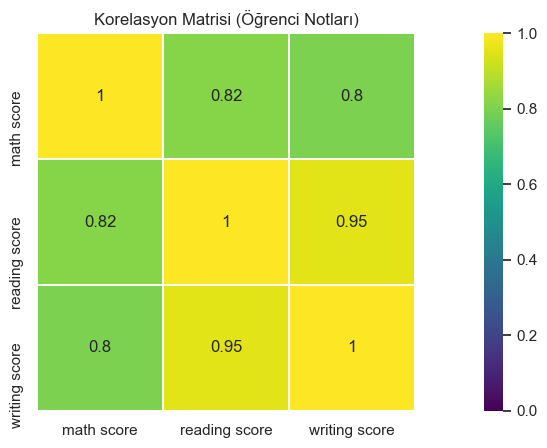

In [45]:
#Soru4
plt.figure(figsize=(18,5))

korelasyon_öğrenciler = df1[["math score", "reading score", "writing score"]].corr()
sns.heatmap(korelasyon_öğrenciler, square=True, annot=True, linewidths=.5, vmin=0, vmax=1, cmap='viridis')
plt.title("Korelasyon Matrisi (Öğrenci Notları)")

plt.show()

In [46]:
#Soru4
#Okuma ve yazma skorları, diğer skorlara kıyasla çok daha fazla bağlantılıdır.